#**Final project, Liliia Yakunina**

##2)  Summary Statistics and Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from google.colab import files
uploaded = files.upload()

Saving Calls_cleaned.parquet to Calls_cleaned.parquet
Saving Contacts_cleaned.parquet to Contacts_cleaned.parquet
Saving Deals_cleaned.parquet to Deals_cleaned.parquet
Saving Spend_cleaned.parquet to Spend_cleaned.parquet


###**2. Descriptive Statistics**

###2.1. Calculate summary statistics for the numerical fields (mean, median, mode, and range).

### 2.1.1. Descriptive statistics of numerical data in Contacts

In [ ]:
## Contacts:  load and preview
contacts_clean = pd.read_parquet("Contacts_cleaned.parquet")
print(contacts_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Client ID      18548 non-null  object        
 1   Manager Name   18548 non-null  category      
 2   Created Time   18548 non-null  datetime64[ns]
 3   Modified Time  18548 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), object(1)
memory usage: 454.2+ KB
None


### 2.1.2. Descriptive statistics of numerical data in Calls





In [ ]:
## Calls:  load and preview
calls_clean = pd.read_parquet("Calls_cleaned.parquet")
print(calls_clean.info())
calls_clean['Call Duration sec'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Call ID               95874 non-null  object        
 1   Call Start Time       95874 non-null  datetime64[ns]
 2   Manager Name          95874 non-null  category      
 3   Client ID             95874 non-null  object        
 4   Call Type             95874 non-null  category      
 5   Call Duration sec     95874 non-null  int32         
 6   Call Status           95874 non-null  category      
 7   Outgoing Call Status  95874 non-null  category      
 8   Scheduled in CRM      95874 non-null  category      
 9   Call Status Grouped   95874 non-null  category      
dtypes: category(6), datetime64[ns](1), int32(1), object(2)
memory usage: 3.1+ MB
None


,Call Duration sec
count,95874.000000
mean,164.841365
std,401.263593
min,0.000000
25%,4.000000
50%,8.000000
75%,97.000000
max,7625.000000


###**Summary statistics analysis of numeric fields in the Calls table**:

**Average call duration** — about 165 seconds (≈2.7 minutes).

Median is only 8 seconds, indicating a large number of very short calls.

**Maximum duration** — 7,625 seconds (≈2 hours 7 minutes), showing strong outliers.

Standard deviation is high, confirming high variability in call durations.

**Conclusion:**

**Call durations are extremely unevenly distributed**: most calls are short, but there are rare very long calls.

For further analysis or visualization, it may be useful to consider median and quartile values, not just the mean, to avoid distortion from outliers.

This data structure suggests the need to use robust statistics methods when plotting or calculating averages.

### 2.1.3. Descriptive statistics of numerical data in Spend

In [ ]:
## Spend:  load and preview
spend_clean = pd.read_parquet("Spend_cleaned.parquet")
print(spend_clean.info())

# Select the numeric columns we want to analyze
numeric_cols_spend = ['Impressions Count', 'Spend Amount(€)', 'Clicks Count']

# Generate descriptive statistics for these columns
spend_clean[numeric_cols_spend].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tracking Date      19862 non-null  datetime64[ns]
 1   Lead Source        19862 non-null  category      
 2   Campaign Name      19862 non-null  string        
 3   Impressions Count  19862 non-null  Int64         
 4   Spend Amount(€)    19862 non-null  float64       
 5   Clicks Count       19862 non-null  Int64         
 6   Ad Group           19862 non-null  string        
 7   Ad Name            19862 non-null  string        
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), string(3)
memory usage: 1.1 MB
None


,Impressions Count,Spend Amount(€),Clicks Count
count,19862.0,19862.000000,19862.0
mean,2571.695197,7.528117,25.095912
std,11691.227016,27.325150,87.032314
min,0.0,0.000000,0.0
25%,1.0,0.000000,0.0
50%,82.0,0.740000,2.0
75%,760.75,6.160000,13.0
max,431445.0,774.000000,2415.0


##**Summary statistics analysis of numeric fields in the Spend table**

**Impressions** — on average about **2,572**, but high variance (standard deviation **11,691**) indicates strong data dispersion; the median is only **82**, meaning most campaigns have few impressions.

**Average spend** — **€7.53**, median only **€0.74**; most campaigns spend very little, while rare large campaigns create outliers.

**Clicks** — on average **25.10**, median only **2**; most campaigns receive few clicks, while a few large campaigns significantly raise the mean.

**Overall conclusion:**

Data is extremely unevenly distributed: most campaigns have low metrics for impressions, spend, and clicks, while rare large campaigns create outliers that strongly affect averages. For analyzing typical campaigns, it is recommended to use median and quartile values to avoid distortion from outliers.

### 2.1.4. Descriptive statistics of numerical data in Deals

In [ ]:
## Deals:  load and preview
deals_clean = pd.read_parquet("Deals_cleaned.parquet")
print(deals_clean.info())

# Select the numeric columns we want to analyze
numeric_cols_deals = ['SLA', 'Course duration', 'Initial Amount Paid (EUR)', 'Offer Total Amount (EUR)']

# Generate descriptive statistics for these columns
deals_clean[numeric_cols_deals].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19847 entries, 0 to 19846
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Deal ID                    19847 non-null  string        
 1   Manager Name               19847 non-null  category      
 2   Closing Date               13904 non-null  datetime64[ns]
 3   Quality                    19847 non-null  category      
 4   Deal Stage                 19847 non-null  category      
 5   Lost Reason                19847 non-null  category      
 6   Landing Page               19847 non-null  string        
 7   Campaign Name              19847 non-null  string        
 8   SLA                        19847 non-null  int64         
 9   Ad Name                    19847 non-null  string        
 10  Ad Group                   19847 non-null  string        
 11  Lead Source                19847 non-null  category      
 12  Paym

,SLA,Course duration,Initial Amount Paid (EUR),Offer Total Amount (EUR)
count,19847.000000,19847.0,19847.0,19847.0
mean,16735.991233,10.857157,988.801884,10220.497304
std,23231.060729,0.832973,615.530827,2587.117756
min,0.000000,6.0,0.0,0.0
25%,0.000000,11.0,1000.0,11000.0
50%,3573.000000,11.0,1000.0,11000.0
75%,27676.500000,11.0,1000.0,11000.0
max,86292.000000,11.0,11500.0,11500.0


**Summary statistics analysis of numeric fields in the Deals table:**

SLA response times vary widely: the average is 16,735.99, but the median is only 3,573, and the maximum reaches 86,292. This indicates that most deals are processed quickly, while rare long cases create a long-tailed distribution.

Course durations are mostly 11 months: average 10.86, median and 75th percentile both 11, minimum duration 6 months.

Initial payments are most often around €1,000: average €988.80, median and 75th percentile €1,000, with a maximum payment of €11,500.

Total deal amounts are also concentrated around fixed values: average €10,220.50, median and 75th percentile €11,000, minimum €0, maximum €11,500.

**Conclusions:**

Most courses last 11 months, with rare short courses (6 months) occurring very infrequently.

Almost all deals have an initial payment around €1,000, and the total deal amount is usually €11,000, indicating standardized pricing.

SLA response times vary significantly: most deals are handled quickly (median 3,573), but rare long-response cases (up to 86,292) increase the mean.

For analyzing typical deals, it is advisable to focus on median and quartile values so that rare long deals do not distort the results.

###**2.2. Analyze categorical fields, such as Quality, Stage, Source, and Product.**

**Goals:**
*   Understand the distribution of categorical variables.
*   Identify the most frequent and rare categories.
*   Determine relationships between categories and key metrics (e.g., deal amount or SLA).

**Tasks:**
*   Count and calculate the share of each category.
*   Create distribution charts (bar plots, pie charts).
*   Compare categories based on key numeric metrics.

###**2.2.1. Selection of Categorical Fields for the Contacts Table**

**Manager Name**: analyze the distribution of the number of contacts by the person responsible for the call.

/tmp/ipython-input-2387001683.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contact_owner_counts.values, y=contact_owner_counts.index, palette=colors, ax=ax)


Saved: /content/png_projekt/contacts_per_manager.png


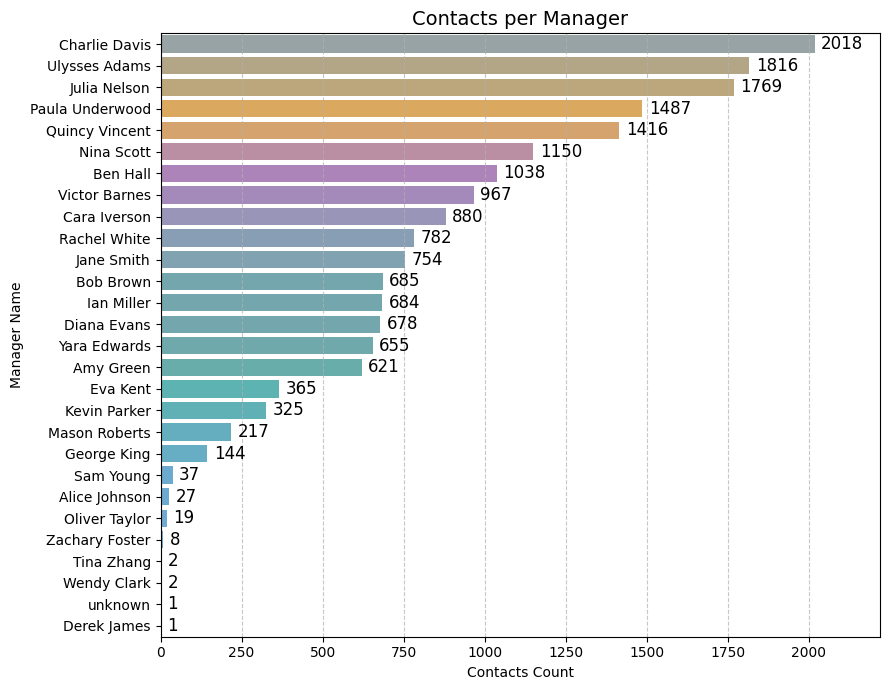

In [ ]:
# Folder for saving output
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# Unified constants for presentation
FIGSIZE = (9, 7)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 12
BAR_LABEL_OFFSET = 0.01  # offset of value labels from bar end (fraction of max value)

# Aggregate contacts per manager
contact_owner_counts = contacts_clean['Manager Name'].astype(str).value_counts().sort_values(ascending=False)

# Custom gradient palette
base_colors = ['#5DADE2', '#48C9B0', '#AF7AC5', '#F5B041', '#95A5A6']
norm = (contact_owner_counts - contact_owner_counts.min()) / (contact_owner_counts.max() - contact_owner_counts.min())
colors = [sns.blend_palette(base_colors, as_cmap=False, n_colors=100)[int(x*99)] for x in norm]

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.barplot(x=contact_owner_counts.values, y=contact_owner_counts.index, palette=colors, ax=ax)

# Titles and axis labels
ax.set_title('Contacts per Manager', fontsize=TITLE_FONT)
ax.set_xlabel('Contacts Count', fontsize=LABEL_FONT)
ax.set_ylabel('Manager Name', fontsize=LABEL_FONT)

# Customize ticks and grid
ax.tick_params(axis='x', labelsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for index, value in enumerate(contact_owner_counts.values):
    ax.text(value + contact_owner_counts.max()*BAR_LABEL_OFFSET, index, str(value),
            va='center', fontsize=DATA_LABEL_FONT, color='black')

# Expand x-axis to avoid cutting labels
ax.set_xlim(0, contact_owner_counts.max() * 1.1)

plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "contacts_per_manager.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Count contacts per manager
contact_owner_counts = contacts_clean['Manager Name'].astype(str).value_counts().sort_values(ascending=False)

# Create DataFrame for display
table_data = pd.DataFrame({
    'Manager Name': contact_owner_counts.index,
    'Contacts Count': contact_owner_counts.values
})

# Set index starting from 1 for readability
table_data.index = range(1, len(table_data) + 1)

# Display the table in Colab
display(table_data)


,Manager Name,Contacts Count
1,Charlie Davis,2018
2,Ulysses Adams,1816
3,Julia Nelson,1769
4,Paula Underwood,1487
5,Quincy Vincent,1416
6,Nina Scott,1150
7,Ben Hall,1038
8,Victor Barnes,967
9,Cara Iverson,880
10,Rachel White,782


### **2.2.2. Selection of Categorical Fields for the Calls Table**

**Call Type**

Count the number of incoming and outgoing calls.

Calculate the percentage of successful calls by type.

Plot a bar chart for visualization.

**Call Status / Outgoing Call Status**

Count the number of calls for each status (completed, missed, not reached, etc.).

Compare the success rate of calls across managers.

Optionally, create a stacked bar chart to show the share of statuses by manager.

**Manager Name**

Count the total number of calls, successful calls, and average call duration per manager.

Create a bar plot with a gradient to visualize activity and performance.

**Scheduled in CRM**

Compare the number and success rate of scheduled versus unscheduled calls.

Saved: /content/png_projekt/distribution_call_types.png


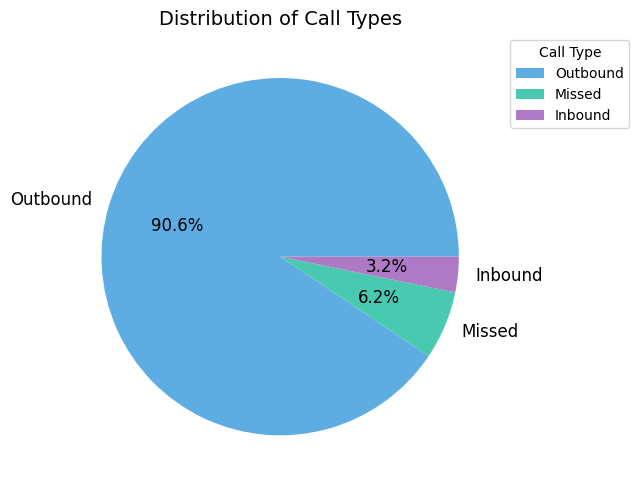

In [ ]:
# Folder for saving output
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# Unified style constants
FIGSIZE = (6, 5)
TITLE_FONT = 14
LEGEND_FONT = 10
AUTOPCT_FONT = 12

# Count values
call_type_counts = calls_clean['Call Type'].value_counts()

# Custom colors
custom_colors = ['#5DADE2', '#48C9B0', '#AF7AC5', '#F5B041', '#95A5A6'][:len(call_type_counts)]

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.pie(
    call_type_counts,
    labels=call_type_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    colors=custom_colors,
    textprops={'fontsize': AUTOPCT_FONT}
)
ax.set_title('Distribution of Call Types', fontsize=TITLE_FONT)

# Add legend
ax.legend(
    call_type_counts.index,
    title="Call Type",
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=LEGEND_FONT
)

plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "distribution_call_types.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Count occurrences of each call type
call_type_counts = calls_clean['Call Type'].value_counts()

# Create DataFrame for display
table_data = pd.DataFrame({
    'Call Type': call_type_counts.index,
    'Count': call_type_counts.values,
    'Percentage (%)': (call_type_counts.values / call_type_counts.sum() * 100).round(1)
})

# Sort by descending count (matching pie chart order)
table_data = table_data.sort_values(by='Count', ascending=False)

# Set index starting from 1 for readability
table_data.index = range(1, len(table_data) + 1)

# Display the table in Colab
display(table_data)


,Call Type,Count,Percentage (%)
1,Outbound,86875,90.6
2,Missed,5921,6.2
3,Inbound,3078,3.2


Saved: /content/png_projekt/top5_call_status.png


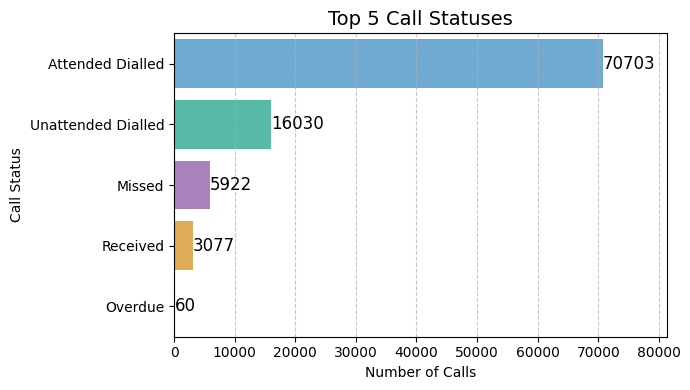

In [ ]:
# Folder for saving
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# Unified style constants
FIGSIZE = (7, 4)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 12
BAR_LABEL_OFFSET = 1

# Convert 'Call Status' to string
calls_clean['Call Status'] = calls_clean['Call Status'].astype(str)

# Count number of calls per status
call_status_counts = calls_clean['Call Status'].value_counts().reset_index()
call_status_counts.columns = ['Call Status', 'Number of Calls']

# Keep only top 5 statuses
top5_call_status = call_status_counts.head(5)

# Custom palette
custom_palette = ['#5DADE2', '#48C9B0', '#AF7AC5', '#F5B041', '#95A5A6']

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.barplot(
    x='Number of Calls',
    y='Call Status',
    data=top5_call_status,
    palette=custom_palette,
    hue='Call Status',
    dodge=False,
    legend=False,
    ax=ax
)

# Titles and labels
ax.set_title('Top 5 Call Statuses', fontsize=TITLE_FONT)
ax.set_xlabel('Number of Calls', fontsize=LABEL_FONT)
ax.set_ylabel('Call Status', fontsize=LABEL_FONT)
ax.tick_params(axis='x', labelsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for i, value in enumerate(top5_call_status['Number of Calls']):
    ax.text(value + BAR_LABEL_OFFSET, i, str(value), va='center', fontsize=DATA_LABEL_FONT)

# Extend x-axis range (add 10% padding to max value)
xmax = top5_call_status['Number of Calls'].max()
ax.set_xlim(0, xmax * 1.15)

plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "top5_call_status.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Convert 'Call Status' column to string
calls_clean['Call Status'] = calls_clean['Call Status'].astype(str)

# Count number of calls per status
call_status_counts = calls_clean['Call Status'].value_counts().reset_index()
call_status_counts.columns = ['Call Status', 'Number of Calls']

# Keep only top 5 most frequent statuses
top5_call_status = call_status_counts.head(5)

# Set index starting from 1 for readability
top5_call_status.index = range(1, len(top5_call_status) + 1)

# Display the table in Colab
display(top5_call_status)


,Call Status,Number of Calls
1,Attended Dialled,70703
2,Unattended Dialled,16030
3,Missed,5922
4,Received,3077
5,Overdue,60


/tmp/ipython-input-3886021368.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: /content/png_projekt/total_calls_by_manager.png


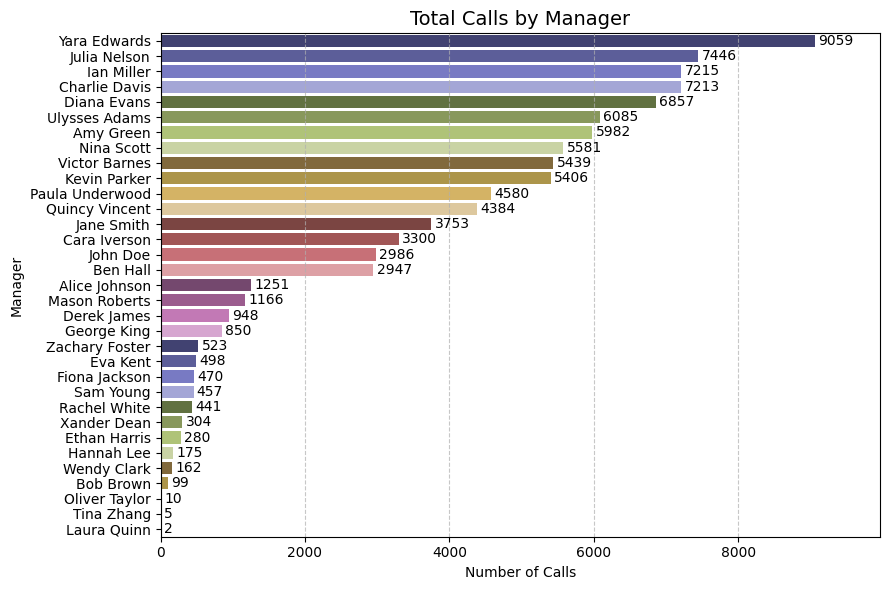

In [ ]:
# Folder for saving output
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# Unified constants for presentation
FIGSIZE = (9, 6)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 10
BAR_LABEL_OFFSET = 0.005  # fraction of max value for label offset

# Ensure string type
calls_clean['Call Status'] = calls_clean['Call Status'].astype(str)
calls_clean['Manager Name'] = calls_clean['Manager Name'].astype(str)

# Count total calls per manager and sort descending
manager_counts = calls_clean.groupby('Manager Name').size().reset_index(name='Total Calls')
manager_counts = manager_counts.sort_values('Total Calls', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)

# Horizontal bar plot
sns.barplot(
    x='Total Calls',
    y='Manager Name',
    data=manager_counts,
    palette='tab20b',
    ax=ax
)

# Titles and labels
ax.set_title('Total Calls by Manager', fontsize=TITLE_FONT)
ax.set_xlabel('Number of Calls', fontsize=LABEL_FONT)
ax.set_ylabel('Manager', fontsize=LABEL_FONT)
ax.tick_params(axis='x', labelsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels at the end of bars
for i, value in enumerate(manager_counts['Total Calls']):
    ax.text(value + max(manager_counts['Total Calls']) * BAR_LABEL_OFFSET,
            i, str(value), va='center', fontsize=DATA_LABEL_FONT, color='black')

# Extend x-axis range to avoid label overflow
xmax = manager_counts['Total Calls'].max()
ax.set_xlim(0, xmax * 1.1)

plt.tight_layout()

# Save figure to file
filename = os.path.join(output_dir, "total_calls_by_manager.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

# Display the plot
plt.show()


In [ ]:
# Ensure string type for consistency
calls_clean['Call Status'] = calls_clean['Call Status'].astype(str)
calls_clean['Manager Name'] = calls_clean['Manager Name'].astype(str)

# Aggregate total calls per manager and sort in descending order
manager_counts = calls_clean.groupby('Manager Name').size().reset_index(name='Total Calls')
manager_counts = manager_counts.sort_values('Total Calls', ascending=False)

# Set index starting from 1 for readability
manager_counts.index = range(1, len(manager_counts) + 1)

# Display the table in Colab
display(manager_counts)

,Manager Name,Total Calls
1,Yara Edwards,9059
2,Julia Nelson,7446
3,Ian Miller,7215
4,Charlie Davis,7213
5,Diana Evans,6857
6,Ulysses Adams,6085
7,Amy Green,5982
8,Nina Scott,5581
9,Victor Barnes,5439
10,Kevin Parker,5406


/tmp/ipython-input-1031686725.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: /content/png_projekt/scheduled_vs_unscheduled.png


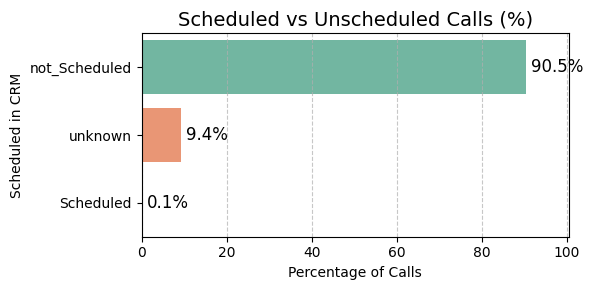

In [ ]:
# Folder for saving
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# New unified constants
FIGSIZE = (6, 3)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 12
BAR_LABEL_OFFSET = 1  # offset for percentage labels

# Convert to string
calls_clean['Scheduled in CRM'] = calls_clean['Scheduled in CRM'].astype(str)

# Count and compute percentages
scheduled_counts = calls_clean['Scheduled in CRM'].value_counts(normalize=True).mul(100).reset_index()
scheduled_counts.columns = ['Scheduled', 'Percentage']

# Sort descending
scheduled_counts = scheduled_counts.sort_values('Percentage', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)
sns.barplot(
    x='Percentage',
    y='Scheduled',
    data=scheduled_counts,
    palette='Set2',
    ax=ax
)

# Add percentage labels at end of bars
for i, row in enumerate(scheduled_counts['Percentage']):
    ax.text(row + BAR_LABEL_OFFSET, i, f"{row:.1f}%", va='center', fontsize=DATA_LABEL_FONT)

# Titles and labels
ax.set_title('Scheduled vs Unscheduled Calls (%)', fontsize=TITLE_FONT)
ax.set_xlabel('Percentage of Calls', fontsize=LABEL_FONT)
ax.set_ylabel('Scheduled in CRM', fontsize=LABEL_FONT)
ax.set_xlim(0, scheduled_counts['Percentage'].max() + 10)
ax.tick_params(axis='x', labelsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "scheduled_vs_unscheduled.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Convert to string for consistency
calls_clean['Scheduled in CRM'] = calls_clean['Scheduled in CRM'].astype(str)

# Count and compute percentages
scheduled_counts = calls_clean['Scheduled in CRM'].value_counts(normalize=True).mul(100).reset_index()
scheduled_counts.columns = ['Scheduled', 'Percentage']

# Sort descending
scheduled_counts = scheduled_counts.sort_values('Percentage', ascending=False)

# Set index starting from 1 for readability
scheduled_counts.index = range(1, len(scheduled_counts) + 1)

# Round Percentage column to 1 decimal place
scheduled_counts['Percentage'] = scheduled_counts['Percentage'].round(1)

# Display the table in Colab
display(scheduled_counts)

,Scheduled,Percentage
1,not_Scheduled,90.5
2,unknown,9.4
3,Scheduled,0.1


In [ ]:
# Ensure columns are string type
for col in ['Call Status', 'Scheduled in CRM', 'Manager Name', 'Call Type']:
    calls_clean[col] = calls_clean[col].astype(str)

# 1. Call Status
call_status_summary = calls_clean['Call Status'].value_counts().reset_index()
call_status_summary.columns = ['Call Status', 'Number of Calls']
call_status_summary['Percentage'] = 100 * call_status_summary['Number of Calls'] / call_status_summary['Number of Calls'].sum()
print("\n--- Call Status Summary ---")
print(call_status_summary)

# 2. Scheduled in CRM
scheduled_summary = calls_clean['Scheduled in CRM'].value_counts(normalize=True).mul(100).reset_index()
scheduled_summary.columns = ['Scheduled', 'Percentage']
print("\n--- Scheduled in CRM Summary ---")
print(scheduled_summary)

# 3. Manager Name
manager_summary = calls_clean.groupby('Manager Name').size().reset_index(name='Total Calls')
manager_summary['Percentage'] = 100 * manager_summary['Total Calls'] / manager_summary['Total Calls'].sum()
print("\n--- Calls per Manager Summary ---")
print(manager_summary.sort_values('Total Calls', ascending=False))

# 4. Call Type
call_type_counts = calls_clean['Call Type'].value_counts()
call_type_percent = call_type_counts / call_type_counts.sum() * 100
call_type_summary = pd.DataFrame({
    'Call Type': call_type_counts.index,
    'Number of Calls': call_type_counts.values,
    'Percentage': call_type_percent.values
})
print("\n--- Call Type Summary ---")
print(call_type_summary)



--- Call Status Summary ---
                   Call Status  Number of Calls  Percentage
0             Attended Dialled            70703   73.745750
1           Unattended Dialled            16030   16.719861
2                       Missed             5922    6.176857
3                     Received             3077    3.209421
4                      Overdue               60    0.062582
5     Scheduled Attended Delay               22    0.022947
6                    Cancelled               20    0.020861
7   Scheduled Unattended Delay               17    0.017732
8           Scheduled Attended               14    0.014602
9         Scheduled Unattended                6    0.006258
10                   Scheduled                3    0.003129

--- Scheduled in CRM Summary ---
       Scheduled  Percentage
0  not_Scheduled   90.465611
1        unknown    9.386278
2      Scheduled    0.148111

--- Calls per Manager Summary ---
       Manager Name  Total Calls  Percentage
31     Yara Edwards  

**Analysis of Calls Data**

**1. Call Status**
Most calls are successfully handled: Attended Dialled accounts for 73.7% of all calls.
Second most frequent is Unattended Dialled (16.7%).
Other statuses (Missed, Received, various Scheduled statuses) make up about 10% combined.
Conclusion: The main activity focuses on outgoing calls. Most calls are handled, but a small percentage of missed or delayed calls requires attention.

**2. Scheduled in CRM**
Most calls were not scheduled: not_Scheduled represents 90.5%.
Unknown status is about 9.4%, and truly scheduled calls (Scheduled) are less than 0.2%.
Conclusion: Almost all calls occur without CRM scheduling, indicating potential need to improve planning and logging for analysis and control.

**3. Calls per Manager**
Highest activity: Yara Edwards (~9.4% of calls), followed by Julia Nelson (~7.8%) and Ian Miller (~7.5%).
Lowest activity: Tina Zhang (5 calls) and Laura Quinn (2 calls).
Conclusion: There is a significant difference in manager activity, which can affect overall sales team efficiency. Consider workload redistribution or additional training for less active staff.

**4. Call Type**
Main call type: Outbound (~90.6%).
Missed and Inbound calls account for 6.2% and 3.2%, respectively.
Conclusion: The department is focused on outgoing calls. The small proportion of inbound and missed calls suggests a need to analyze reasons for missed calls and improve inbound handling.

**Overall Conclusions**

The sales department actively uses outgoing calls, with most calls reaching clients.

CRM call planning is almost unused, complicating monitoring and analysis.

Manager activity varies significantly, which should be considered for performance evaluation and task allocation.

Small call categories (missed, delayed, scheduled) are few but may reveal hidden process issues and require attention.

###2.2.3. Choosing Categorical Fields for the Spend Table

We will examine the total Spend per Source channel and visualize it with a chart displaying the aggregated Spend for each source.

In [ ]:
spend_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tracking Date      19862 non-null  datetime64[ns]
 1   Lead Source        19862 non-null  category      
 2   Campaign Name      19862 non-null  string        
 3   Impressions Count  19862 non-null  Int64         
 4   Spend Amount(€)    19862 non-null  float64       
 5   Clicks Count       19862 non-null  Int64         
 6   Ad Group           19862 non-null  string        
 7   Ad Name            19862 non-null  string        
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), string(3)
memory usage: 1.1 MB


Saved: /content/png_projekt/total_spend_by_source.png


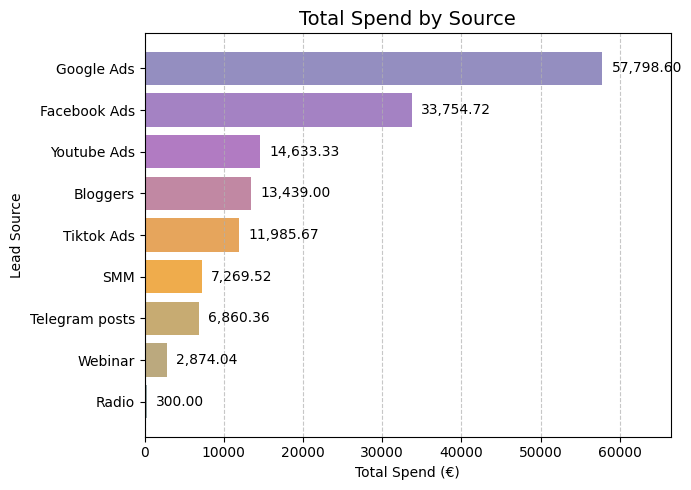

In [ ]:
# Folder for saving
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)

# Unified constants
FIGSIZE = (7, 5)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 10

# Aggregate spend per source (exclude "Test")
total_spend_per_source = spend_clean[spend_clean['Lead Source'] != 'Test'].groupby(
    'Lead Source', observed=True
)['Spend Amount(€)'].sum().reset_index()

# Filter positive values only
total_spend_per_source = total_spend_per_source[total_spend_per_source['Spend Amount(€)'] > 0]

# Sort ascending for barh
total_spend_per_source = total_spend_per_source.sort_values(by='Spend Amount(€)', ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=FIGSIZE)
bars = ax.barh(
    total_spend_per_source['Lead Source'],
    total_spend_per_source['Spend Amount(€)'],
    color=colors
)

# Add labels showing Spend values at the end of bars (without €)
for bar in bars:
    ax.text(bar.get_width() + max(total_spend_per_source['Spend Amount(€)'])*0.02,
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,.2f}',
            va='center', fontsize=DATA_LABEL_FONT, color='black')

# Titles and labels
ax.set_title('Total Spend by Source', fontsize=TITLE_FONT)
ax.set_xlabel('Total Spend (€)', fontsize=LABEL_FONT)
ax.set_ylabel('Lead Source', fontsize=LABEL_FONT)
ax.tick_params(axis='x', labelsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)

# Expand x-axis so labels fit
ax.set_xlim(0, total_spend_per_source['Spend Amount(€)'].max() * 1.15)

# Grid: only vertical lines
ax.grid(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save figure
filename = os.path.join(output_dir, "total_spend_by_source.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Aggregate spend per source (exclude "Test")
total_spend_per_source = spend_clean[spend_clean['Lead Source'] != 'Test'].groupby(
    'Lead Source', observed=True
)['Spend Amount(€)'].sum().reset_index()

# Filter positive values only
total_spend_per_source = total_spend_per_source[total_spend_per_source['Spend Amount(€)'] > 0]

# Sort ascending to match barh plot
total_spend_per_source = total_spend_per_source.sort_values(by='Spend Amount(€)', ascending=True)

# Round Spend Amount to 2 decimal places
total_spend_per_source['Spend Amount(€)'] = total_spend_per_source['Spend Amount(€)'].round(2)

# Set index starting from 1 for readability
total_spend_per_source.index = range(1, len(total_spend_per_source) + 1)

# Display the table in Colab
display(total_spend_per_source)

,Lead Source,Spend Amount(€)
1,Radio,300.00
2,Webinar,2874.04
3,Telegram posts,6860.36
4,SMM,7269.52
5,Tiktok Ads,11985.67
6,Bloggers,13439.00
7,Youtube Ads,14633.33
8,Facebook Ads,33754.72
9,Google Ads,57798.60


In [ ]:
deals_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19847 entries, 0 to 19846
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Deal ID                    19847 non-null  string        
 1   Manager Name               19847 non-null  category      
 2   Closing Date               13904 non-null  datetime64[ns]
 3   Quality                    19847 non-null  category      
 4   Deal Stage                 19847 non-null  category      
 5   Lost Reason                19847 non-null  category      
 6   Landing Page               19847 non-null  string        
 7   Campaign Name              19847 non-null  string        
 8   SLA                        19847 non-null  int64         
 9   Ad Name                    19847 non-null  string        
 10  Ad Group                   19847 non-null  string        
 11  Lead Source                19847 non-null  category      
 12  Paym

/tmp/ipython-input-3757878913.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3757878913.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3757878913.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3757878913.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3757878913.py:48: FutureWarning: 

Passin

Saved: /content/png_projekt/deals_distributions.png


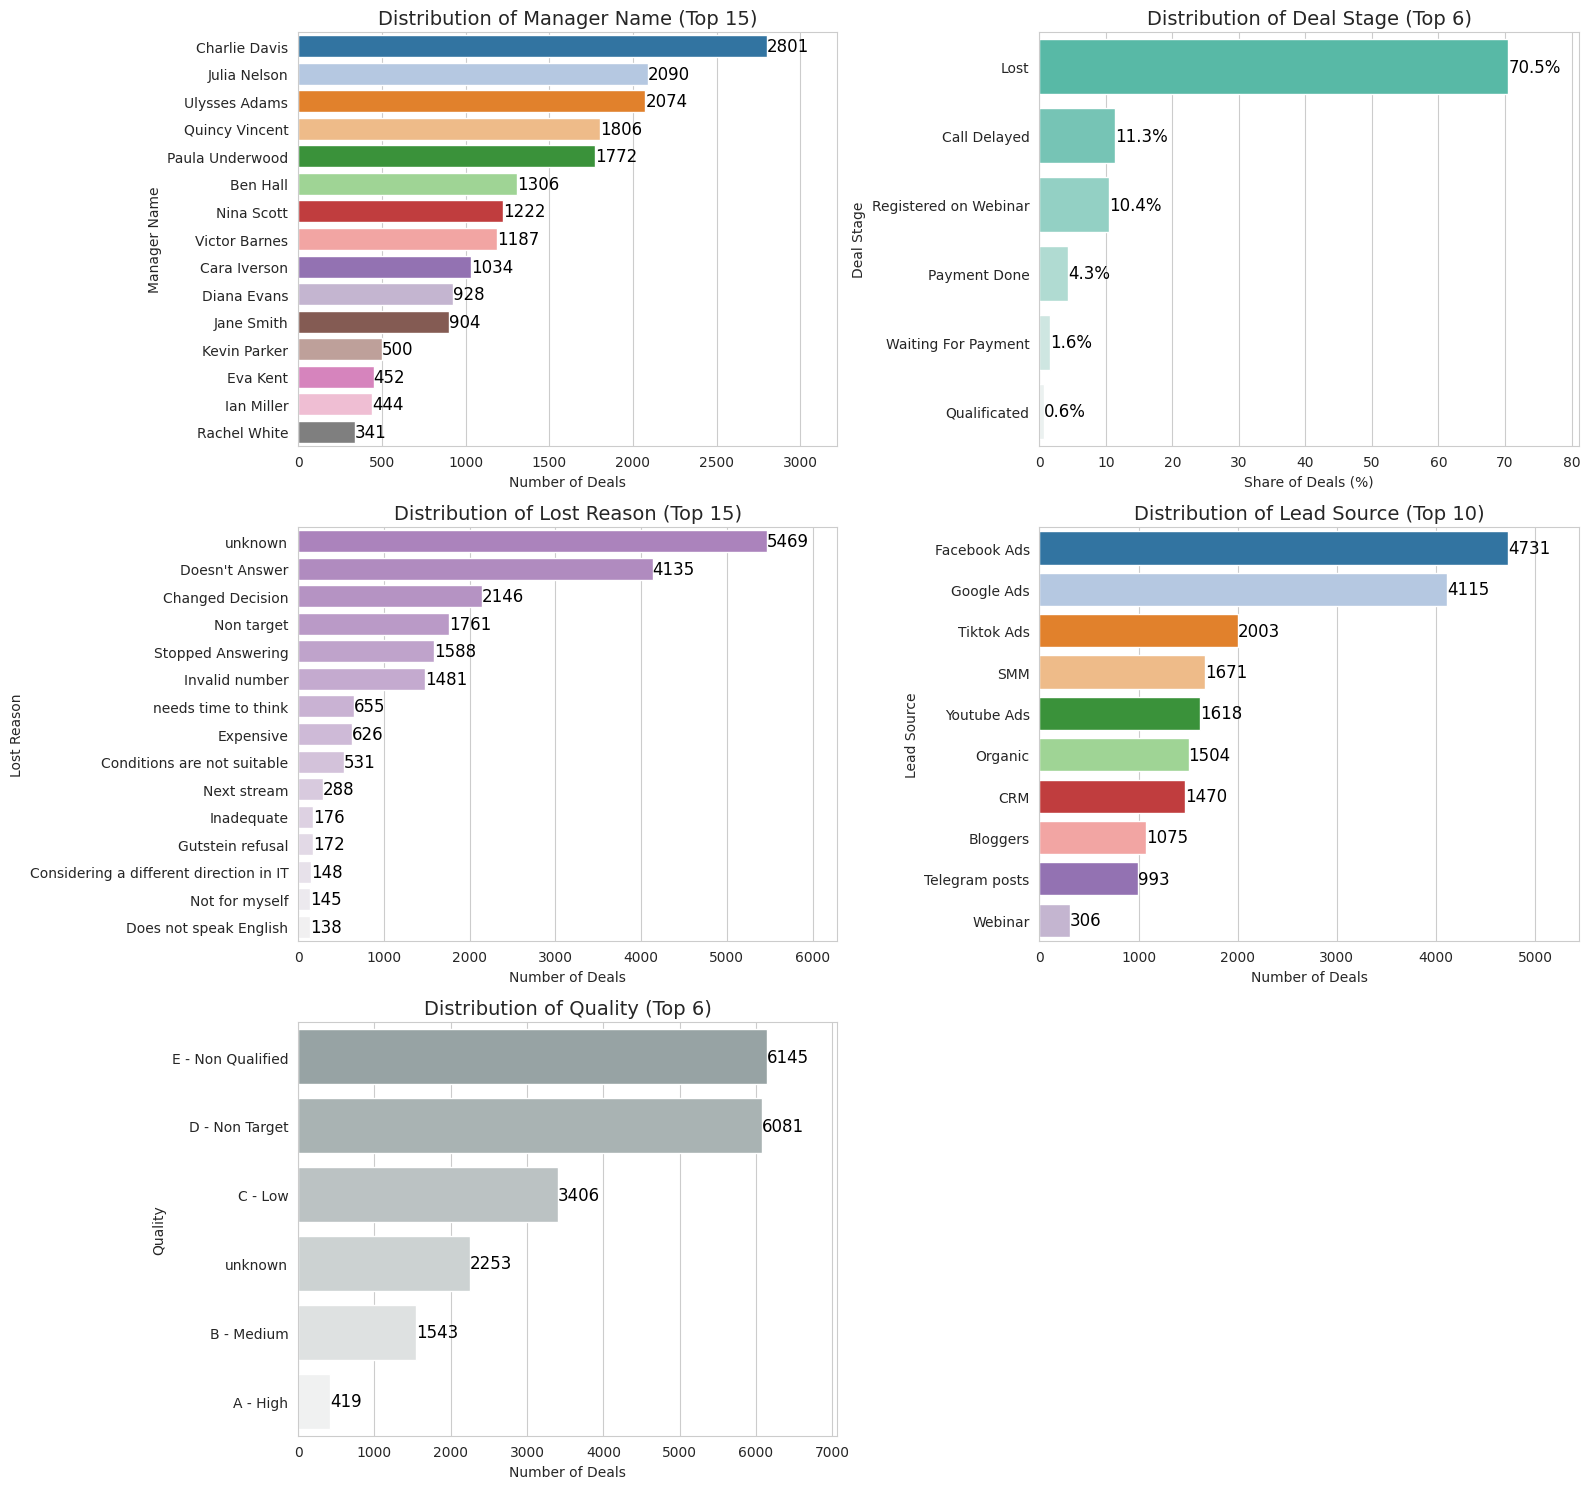

In [ ]:
# Unified constants
FIGSIZE = (16, 15)  # wider for 2 charts per row
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 12

sns.set_style("whitegrid")
plt.rcParams.update({'figure.autolayout': True})

cols = ['Manager Name', 'Deal Stage', 'Lost Reason', 'Lead Source', 'Quality']
top_n = [15, 6, 15, 10, 6]
base_colors = ['#5DADE2', '#48C9B0', '#AF7AC5', '#F5B041', '#95A5A6']

# Setup 2 columns
n_cols = 2
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=FIGSIZE)

# Flatten axes robustly
if n_rows * n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for ax, col, n, base_color in zip(axes, cols, top_n, base_colors):
    # Filter zero/missing
    filtered_col = deals_clean[col][~deals_clean[col].isin([0, '0', None])]

    # Special case: Deal Stage in percentages
    if col == "Deal Stage":
        counts = filtered_col.value_counts(normalize=True).sort_values(ascending=False).head(n) * 100
        df_plot = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
        x_label = "Share of Deals (%)"
    else:
        counts = filtered_col.value_counts().sort_values(ascending=False).head(n)
        df_plot = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
        x_label = "Number of Deals"

    # Palette
    if col in ['Manager Name', 'Lead Source']:
        colors = sns.color_palette("tab20", n_colors=len(df_plot))
    else:
        colors = sns.light_palette(base_color, n_colors=len(df_plot), reverse=True)

    # Plot bars
    sns.barplot(
        x='Count',
        y='Category',
        data=df_plot,
        palette=colors,
        ax=ax,
        dodge=False,
        order=df_plot['Category']
    )

    # Expand x-axis
    max_val = df_plot['Count'].max()
    ax.set_xlim(0, max_val * 1.15)

    # Titles and labels
    ax.set_xlabel(x_label, fontsize=LABEL_FONT)
    ax.set_ylabel(col, fontsize=LABEL_FONT)
    ax.set_title(f'Distribution of {col} (Top {n})', fontsize=TITLE_FONT)
    ax.tick_params(axis='x', labelsize=TICKS_FONT)
    ax.tick_params(axis='y', labelsize=TICKS_FONT)

    # Add labels
    for i, value in enumerate(df_plot['Count']):
        if col == "Deal Stage":
            ax.text(value, i, f'{value:.1f}%', va='center', fontsize=DATA_LABEL_FONT, color='black')
        else:
            ax.text(value, i, f'{int(value)}', va='center', fontsize=DATA_LABEL_FONT, color='black')

# Hide any unused subplots
for ax in axes[len(cols):]:
    ax.axis('off')

plt.tight_layout()

# Save figure
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)
filename = os.path.join(output_dir, "deals_distributions.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# Define columns and top N values for each
cols = ['Manager Name', 'Deal Stage', 'Lost Reason', 'Lead Source', 'Quality']
top_n = [15, 6, 15, 10, 6]

# Process and display a separate table for each column
for col, n in zip(cols, top_n):
    # Filter out zero/missing values
    filtered_col = deals_clean[col][~deals_clean[col].isin([0, '0', None])]
    # Count occurrences and take top N
    counts = filtered_col.value_counts().sort_values(ascending=False).head(n)
    # Create DataFrame for the table
    df_table = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values
    })
    # Set index starting from 1 for readability
    df_table.index = range(1, len(df_table) + 1)
    # Display the table with a header for clarity
    print(f"Table for {col} (Top {n})")
    display(df_table)
    print("\n")  # Add spacing between tables

Table for Manager Name (Top 15)


,Category,Count
1,Charlie Davis,2801
2,Julia Nelson,2090
3,Ulysses Adams,2074
4,Quincy Vincent,1806
5,Paula Underwood,1772
6,Ben Hall,1306
7,Nina Scott,1222
8,Victor Barnes,1187
9,Cara Iverson,1034
10,Diana Evans,928




Table for Deal Stage (Top 6)


,Category,Count
1,Lost,13997
2,Call Delayed,2248
3,Registered on Webinar,2072
4,Payment Done,858
5,Waiting For Payment,325
6,Qualificated,128




Table for Lost Reason (Top 15)


,Category,Count
1,unknown,5469
2,Doesn't Answer,4135
3,Changed Decision,2146
4,Non target,1761
5,Stopped Answering,1588
6,Invalid number,1481
7,needs time to think,655
8,Expensive,626
9,Conditions are not suitable,531
10,Next stream,288




Table for Lead Source (Top 10)


,Category,Count
1,Facebook Ads,4731
2,Google Ads,4115
3,Tiktok Ads,2003
4,SMM,1671
5,Youtube Ads,1618
6,Organic,1504
7,CRM,1470
8,Bloggers,1075
9,Telegram posts,993
10,Webinar,306




Table for Quality (Top 6)


,Category,Count
1,E - Non Qualified,6145
2,D - Non Target,6081
3,C - Low,3406
4,unknown,2253
5,B - Medium,1543
6,A - High,419


**Analysis of Deals Data**

**1. Manager Name** – who handles the most deals
The highest number of deals is handled by Charlie Davis, followed by Julia Nelson and Ulysses Adams.
Top managers handle significantly more deals than those at the bottom of the list.
The lowest numbers are managed by rare or new managers, such as Wendy Clark and Xander Dean.
Conclusion: There are clear leaders in activity and workload; consider analyzing deal distribution to ensure balanced workloads.

**2. Deal Stage** – distribution by stages
Most deals are in the Lost stage (~70%), indicating high losses.
Next most frequent are Call Delayed and Registered on Webinar, each ~10%.
A smaller portion of deals are completed with payment (Payment Done ~4%) or in early stages.
Conclusion: Attention is needed on lead management processes to reduce the number of lost deals.

**3. Lost Reason** – reasons for lost deals
Most deals are lost due to: unknown, Doesn't Answer, Changed Decision.
Other reasons (Non target, Stopped Answering, Invalid number) account for a smaller share.
Conclusion: Detailed analysis of the "unknown" category is recommended, as better tracking of loss reasons may be needed.

**4. Lead Source** – lead source effectiveness
Most productive sources: Facebook Ads, Google Ads, TikTok Ads, each contributing more than 10% of all deals.
Least leads come from Offline, Test, and some partner channels.
Conclusion: Marketing efforts and budget should be optimized toward the most effective sources; resources may need reallocation.

**5. Quality** – deal quality distribution
Most deals are rated D - Non Target or E - Non Qualified (~30% each).
Less than half of deals have high or medium potential (A - High ~2%, B - Medium ~8%).
A significant share is unknown (~11%).
Conclusion: Managers may fill this field subjectively; the large portion of low-quality deals signals the need for lead analysis and filtering of potential clients.

In [ ]:
# List of categorical columns to analyze
categorical_cols = [
    'Manager Name', 'Deal Stage', 'Lost Reason', 'Lead Source',
    'Payment Type', 'Course Name', 'Education Type', 'German Level New'
]

# Loop through each categorical column and display counts and percentages
for col in categorical_cols:
    print(f"\n--- {col} Summary ---")
    counts = deals_clean[col].value_counts(dropna=False)  # count occurrences including NaN
    percentages = 100 * counts / counts.sum()  # calculate percentage
    summary_df = pd.DataFrame({
        col: counts.index,
        'Number of Deals': counts.values,
        'Percentage': percentages.values
    })

    print(summary_df)



--- Manager Name Summary ---
       Manager Name  Number of Deals  Percentage
0     Charlie Davis             2801   14.112964
1      Julia Nelson             2090   10.530559
2     Ulysses Adams             2074   10.449942
3    Quincy Vincent             1806    9.099612
4   Paula Underwood             1772    8.928302
5          Ben Hall             1306    6.580340
6        Nina Scott             1222    6.157102
7     Victor Barnes             1187    5.980753
8      Cara Iverson             1034    5.209855
9       Diana Evans              928    4.675770
10       Jane Smith              904    4.554845
11     Kevin Parker              500    2.519272
12         Eva Kent              452    2.277422
13       Ian Miller              444    2.237114
14     Rachel White              341    1.718144
15    Mason Roberts              258    1.299945
16        Bob Brown              231    1.163904
17    Oliver Taylor              160    0.806167
18      George King               84   

Saved: /content/png_projekt/grouped_call_status.png


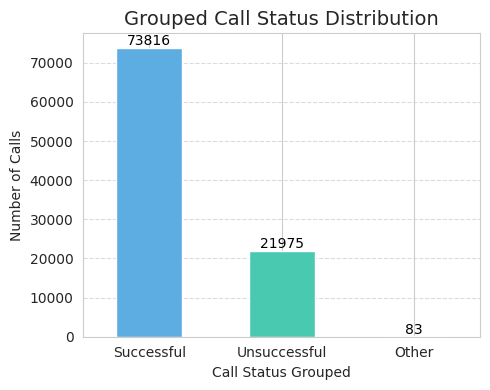

In [ ]:
# Unified constants
FIGSIZE = (5, 4)
TITLE_FONT = 14
LABEL_FONT = 10
TICKS_FONT = 10
DATA_LABEL_FONT = 10

# Status groups dictionary
status_groups = {
    'Attended Dialled': 'Successful',
    'Received': 'Successful',
    'Scheduled Attended': 'Successful',
    'Scheduled Attended Delay': 'Successful',

    'Unattended Dialled': 'Unsuccessful',
    'Missed': 'Unsuccessful',
    'Scheduled Unattended': 'Unsuccessful',
    'Scheduled Unattended Delay': 'Unsuccessful',

    'Cancelled': 'Other',
    'Overdue': 'Other',
    'Scheduled': 'Other'
}

# Map grouped statuses
calls_clean['Call Status Grouped'] = calls_clean['Call Status'].map(status_groups)

# Count per group
status_group_counts = calls_clean['Call Status Grouped'].value_counts()

# Custom palette (pick 3 colors from your palette)
custom_colors = ['#5DADE2', '#48C9B0', '#AF7AC5']  # e.g., blue, mint, lavender

# Plot
fig, ax = plt.subplots(figsize=FIGSIZE)
bars = status_group_counts.plot(kind='bar', color=custom_colors, ax=ax)

# Titles and labels
ax.set_title("Grouped Call Status Distribution", fontsize=TITLE_FONT)
ax.set_ylabel("Number of Calls", fontsize=LABEL_FONT)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=TICKS_FONT)
ax.tick_params(axis='y', labelsize=TICKS_FONT)

# Grid only vertical
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of bars
for i, value in enumerate(status_group_counts.values):
    ax.text(i, value + max(status_group_counts.values)*0.01, f'{value}',
            ha='center', fontsize=DATA_LABEL_FONT, color='black')

plt.tight_layout()

# Save figure
output_dir = "/content/png_projekt"
os.makedirs(output_dir, exist_ok=True)
filename = os.path.join(output_dir, "grouped_call_status.png")
fig.savefig(filename, dpi=300)
print(f"Saved: {filename}")

plt.show()


In [ ]:
# --- Prepare table for grouped call status ---
calls_table = calls_clean.copy()

# Map grouped statuses
calls_table['Call Status Grouped'] = calls_table['Call Status'].map(status_groups)

# Count per group
status_group_counts_table = calls_table['Call Status Grouped'].value_counts().reset_index()
status_group_counts_table.columns = ['Call Status Grouped', 'Number of Calls']

# Display the table
print("Grouped Call Status Distribution")
display(status_group_counts_table)


Grouped Call Status Distribution


,Call Status Grouped,Number of Calls
0,Successful,73816
1,Unsuccessful,21975
2,Other,83


**Overall Conclusion from Data Analysis**

From the conducted analysis, several key insights were identified, highlighting both strengths and critical issues in the operation of our online school:

Strong unevenness: Data on call duration, advertising spend, and deal response time is highly uneven. Most of our activity is concentrated on a small fraction of deals or campaigns.

**High losses**: A large share of deals (~70%) are in the Lost stage. This is the most critical issue, especially concerning that ~27% of loss reasons are unknown.

**Manager activity:** There is a significant difference in workload among managers. Clear leaders handle far more deals and calls than others.

**Inefficient planning:** Almost all calls (~90%) are not scheduled in CRM, complicating analysis and management.

**Course standardization:** Course pricing and duration are mostly standardized. Most courses last 11 months, with an initial payment around €1,000.

**Lead quality issues:** A significant portion of leads (E - Non Qualified, D - Non Target) is considered low quality, indicating that marketing channels may be attracting non-target audiences.

**Key Takeaway:**

To improve business efficiency, focus should be placed on reducing the percentage of lost deals and optimizing marketing spend by targeting higher-quality leads. This approach will create a synergistic effect, boosting overall profitability.

In [ ]:
# output_dir = "/content/png_projekt"
# os.makedirs(output_dir, exist_ok=True)
# # import os

# print(os.listdir(output_dir))
# !zip -r png_projekt.zip /content/png_projekt
# from google.colab import files
# files.download("png_projekt.zip")

